<a href="https://colab.research.google.com/github/sravanidhuli/VideoSumm/blob/main/Capstone_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets
SumMe, TvSum, OVP, Youtube

eccv16_dataset_summe_google_pool5.h5\
eccv16_dataset_tvsum_google_pool5.h5\
eccv16_dataset_ovp_google_pool5.h5\
eccv16_dataset_youtube_google_pool5.h5

These datasets have been used by  for sequence-to-sequence video summarisation
problems. Specifically, have curated these datasets for the purpose of video summarisation in the
form that we desire. They extracted the CNN feature vectors for each frame from the penultimate layer
of the CNN GoogLeNet pretrained on ImageNet.

For each shot k ∈ K, where i and j are the indices of the first and last frames of the shot, sk is the score of the kth shot defined as,

sk =(
1/
j − i + 1)
X
n∈[i,j]
fn

Where fn is the frame-level importance score at index n.

Each dataset follows the same data structure:
***********************************************************************************************************************************************
/key

    /features                 2D-array with shape (n_steps, feature-dimension)
    /gtscore                  1D-array with shape (n_steps), stores ground truth improtance score (used for training, e.g. regression loss)
    /user_summary             2D-array with shape (num_users, n_frames), each row is a binary vector (used for test)
    /change_points            2D-array with shape (num_segments, 2), each row stores indices of a segment
    /n_frame_per_seg          1D-array with shape (num_segments), indicates number of frames in each segment
    /n_frames                 number of frames in original video
    /picks                    posotions of subsampled frames in original video
    /n_steps                  number of subsampled frames
    /gtsummary                1D-array with shape (n_steps), ground truth summary provided by user (used for training, e.g. maximum likelihood)
    /video_name (optional)    original video name, only available for SumMe dataset
***********************************************************************************************************************************************
Note: OVP and YouTube only contain the first three keys, i.e. ['features', 'gtscore', 'gtsummary']

## Data Wrangling

The above datasets were downloaded from the following URLs:

https://kingston.box.com/shared/static/zefb0i17mx3uvspgx70hovt9rr2qnv7y.zip datasets.zip

https://kingston.box.com/shared/static/2u2nqelxsptzefp1mno4z28kimmbljw2.zip vasnet_models.zip

The code to download files from the above URLs is as follows:
Save the below shell script in download.sh.
And run the following command to download:

./download.sh datasets_models_urls.txt

In [ ]:
#!/bin/bash

#set -x

for var in "$@"; do

	cat $var | while read line; do
		url=$( echo $line | cut -d' ' -f1)
		filename=$( echo $line | cut -d' ' -f2)    
		ext="${filename##*.}"
		#echo $url, $filename
		
		wget -q --show-progress $url -O $filename
		
		echo "Unpacking $filename"
		if [ "$ext" == "zip" ]; then
			unzip -q -o $filename    
		fi    
		if [ "$ext" == "tgz" ]; then
			tar xzf $filename    
		fi
		
		echo "Removing  $filename"
		rm $filename    
	done

done

If you want to create your own h5 dataset following this format, you can use below code:

In [ ]:
import h5py
h5_file_name = 'blah blah blah'
f = h5py.File(h5_file_name, 'w')

# video_names is a list of strings containing the 
# name of a video, e.g. 'video_1', 'video_2'
for name in video_names:
    f.create_dataset(name + '/features', data=data_of_name)
    f.create_dataset(name + '/gtscore', data=data_of_name)
    f.create_dataset(name + '/user_summary', data=data_of_name)
    f.create_dataset(name + '/change_points', data=data_of_name)
    f.create_dataset(name + '/n_frame_per_seg', data=data_of_name)
    f.create_dataset(name + '/n_frames', data=data_of_name)
    f.create_dataset(name + '/picks', data=data_of_name)
    f.create_dataset(name + '/n_steps', data=data_of_name)
    f.create_dataset(name + '/gtsummary', data=data_of_name)
    f.create_dataset(name + '/video_name', data=data_of_name)
f.close()

## Data Exploration

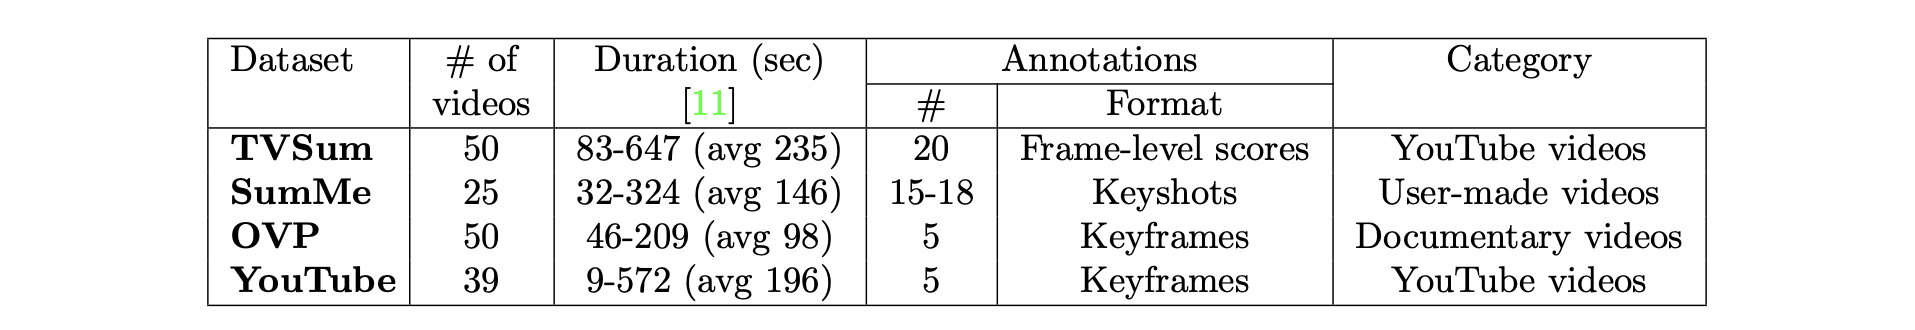

The above list the datasets and their different features. 

1. '#' of videos refers to the number of videos contained in the dataset. Duration refers to the length of each video in seconds. 

2. Under Annotations, # refers to the number of people who provided a ground truth summarisation and Format refers to the format for the summarisation. 
3. The different formats can be summarised again as follows: 
  
  (a) Keyshots are binary vectors provided along with shot boundaries that can be used to segment and classify whichindividual frames belong to shots that belong to the summarisation.
  
  (b) Frame-level scores here refer
to the frame-level importance scores that describe how likely an individual frame is to belong to the
summarisation.

  (c) Keyframes refers to a binary vector describing which exact frames belong to the
summarisation. 

The data collected in this dataset that we care about most are the shot-level importance scores collected using Amazon Mechanical Turk. 

These shot-level importance scores are a rating from 1 (not
important) to 5 (very important) provided for each uniform-length shot. 

These were averaged across all
annotations to produce frame-level importance scores.


#### TVSum


*   The TVSum dataset is created by [3] for the problem of tackling title-based video summarisation. 
*   The dataset takes 50 videos from YouTube representing a variety of genres. 10 categories of videos were selected from the TRECVid Multimedia Even Detection task, 5 from each category.



#### SumMe


*   The SumMe benchmark dataset is created to evaluate their model for video summarisation that uses an **interestingness metric** and the 0-1 knapsack problem. 
*   The dataset is comprised of 25 **user-made videos** that are raw and unedited.
*   This dataset contains user summaries formatted as **keyshot summaries.**
*   These keyshots have been created by using their super-frames segmentation approach to delineate **shot-boundary frames**.
*   From these shot-boundaries, users were asked to annotate what shots they believed should belong to the summarisation,
producing a binary vector per annotator corresponding to the shots to keep.

#### Open Video Project (OVP)


*   The open video project (OVP)[1] is an archive of digitized video content available to be used for research. T
*   There are a variety of different topics explored in the 3931 videos as of May 2020, most of a “documentary” style.
*   VSumm methodolgy [2] curated 50 videos from this archive and provided summarisations for the purpose ofevaluating a model designed for video summarisation

#### YouTube


*   The YouTube dataset is a collection of videos from
websites similar to and including YouTube that are diverse in colour, length, motion and subject.
*   Importantly, the YouTube dataset contains 50 videos but after removing cartoon videos,
which we don’t wish to consider for this problem, it contains 39.

50 users provided 5 video summaries for 5 separate videos each from OVP and YouTube. 

They did
this by choosing the individual frames they believe collated to form an apt summarisation of the video. This is a **keyframe approach** to video summarisation. 

This can easily be interpreted as a **frame-level
importance score format**  by viewing the binary vector as a probability vector where certain frames are
guaranteed to belong to the summarisation.


#### References

[1] Open video project. Last accessed 10 May 2020.

[2] Sandra Avila, Ana Lopes, Antonio da Luz, and Arnaldo Ara´ujo. Vsumm: A mechanism designed
to produce static video summaries and a novel evaluation method. Pattern Recognition Letters,
32:56–68, 01 2011.

[3] Yale Song, J. Vallmitjana, A. Stent, and A. Jaimes. Tvsum: Summarizing web videos using titles.
In 2015 IEEE Conference on Computer Vision and Pattern Recognition (CVPR), pages 5179–5187,
2015.